# CREDIT CARD FRAUD DETECTION PROJECT


**we will be using a dataset from kaggle to identify if a certain type of bank transaction is a fraud or not, this project is an example of  classification dataset, we will  examine different  models to come up with one that best detects fraud.The description below is an excerpt from kaggle**
     
         "The dataset contains transactions made by credit cards in september 2013 by European card holders. this dataset   presents transactions that occured within two days"
 
 the data is highly unbalanced, we will use Resampling techniques to overcome that challenge


In [1]:
# regular EDA and Plotting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


from sklearn.utils import resample

# importing our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluators
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,recall_score,precision_score,plot_roc_curve,classification_report

In [2]:
## importing data
df = pd.read_csv("./data/creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# check for null values
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
fraud = df[df.Class==1]
not_fraud = df[df.Class==0]
not_fraud_percentage = len(not_fraud)/len(df) *100
fraud_percentage = len(fraud)/len(df) *100
print("percentage of transactions that are fraud",fraud_percentage,"%")
print("percentage of transactions that are not fraud is",round(not_fraud_percentage,2),"%")

percentage of transactions that are fraud 0.1727485630620034 %
percentage of transactions that are not fraud is 99.83 %


In [7]:
not_fraud.shape,fraud.shape

((284315, 31), (492, 31))

 from the code above, you can see that our observation at the start has been proven right, the dataset is greatly unbalanced, we will use resampling module from sciKit-learn      to oversample the minority class

### oversampling minority class

In [8]:
# let's split the data
X = df.drop('Class',axis=1)
y = df.Class

X.shape,y.shape

((284807, 30), (284807,))

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=21)


we do not oversample before splitting the data, as this can allow the exact same observations to be present in both the test and train sets.
this can allow our model to simply memorize specific data points and cause overfitting and poor generalization  to the test data

in the code that follows, we will upsample the test data on it is own

In [10]:
#concat test data back together
test_concat = pd.concat([X_test,y_test],axis=1)
test_concat.shape

(56962, 31)

In [11]:
is_test_fraud = test_concat[test_concat.Class==1]
not_test_fraud = test_concat[test_concat.Class==0]
len(is_test_fraud),len(not_test_fraud)

(109, 56853)

In [12]:


is_test_fraud_upsampled = resample(is_test_fraud,replace=True,n_samples=len(not_test_fraud),random_state=21)

final_test_concat = pd.concat([is_test_fraud_upsampled,not_test_fraud])
final_test_concat.Class.value_counts()

1    56853
0    56853
Name: Class, dtype: int64

In [13]:
last_final_test_concat = final_test_concat.sample(frac=0.01,random_state=21)
x_test = last_final_test_concat.drop('Class',axis=1)
y_test = last_final_test_concat.Class

x_test.shape,y_test.shape

((1137, 30), (1137,))

let's get into our train data and start upsampling the minority class

In [14]:
# concat our training data back together
x = pd.concat([X_train,y_train],axis=1)
x.shape

(227845, 31)

In [15]:
is_fraud = x[x.Class==1]
fraud_not = x[x.Class==0]
len(is_fraud),len(fraud_not)

(383, 227462)

In [16]:
## oversampling the minority class which is 'is_fraud'
is_fraud_upsampled = resample(is_fraud,replace=True,n_samples=len(fraud_not),random_state=21)
is_fraud_upsampled.shape

(227462, 31)

In [17]:
# let's concat our data back together
upsampled_data = pd.concat([fraud_not,is_fraud_upsampled])
upsampled_data.Class.value_counts()

1    227462
0    227462
Name: Class, dtype: int64

In [22]:

final_upsampled = upsampled_data.sample(frac=0.003,random_state=21)
y_train = final_upsampled.Class
x_train = final_upsampled.drop('Class',axis = 1)
is_fraud = final_upsampled[final_upsampled.Class==1]
fraud_not = final_upsampled[final_upsampled.Class==0]
len(is_fraud),len(fraud_not),len(final_upsampled)

(668, 697, 1365)

our upsampled data has an equal class values


## modelling

we have now prepared our data fro modelling, we will use the following  and compare their results

    1. Logistic Regression
    2. RandomForestClassifier
    3. KNeighbors classifier
    
 we are using the above algorithms because we are solving a classification problem

In [23]:
models= {"KNN":KNeighborsClassifier(),
        "LogisticRegression":LogisticRegression(),
        "RandomForestClassifier":RandomForestClassifier()}

# create a function to fit and score the models above
def fit_score_models(models,x_train,X_test,y_train,y_test):
    """
    it helps in fitting and scoring the mentioned models
    """
    np.random_state = 21
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores
        

In [26]:
model_scores = fit_score_models(models=models,x_train=x_train,X_test=x_test,y_train=y_train,y_test=y_test)
model_scores


{'KNN': 0.6543535620052771,
 'LogisticRegression': 0.9349164467897977,
 'RandomForestClassifier': 0.9595426561125769}

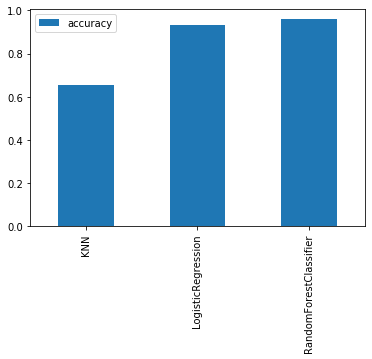

In [27]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])

model_compare.T.plot.bar()


## model tuning

**we will use RandomizedSearchCv to fine tune our parameters to come up with the best, RandomizedSearchCV automatically tries different combinations,evaluates them, and saves the best**

In [28]:
# different hyperparameters for logisticregression
log_reg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

# different hyperparameters for randomforestclassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

In [29]:
# using RandimzedsearchCV

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               n_iter=20,
                               cv=5,
                               verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 3792.690190732246}

In [32]:
rs_log_reg.score(x_test,y_test)

0.9454705364995603

now we have tuned LogisticRegression and have improved on our model, from 0.93 to 0.945,

**let's improve our RandomForestClasssifier**

In [33]:
## improving randomforestclassifier


rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          cv = 5,
                          n_iter = 20,
                          verbose = True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [34]:
rs_rf.best_params_

{'n_estimators': 860,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None}

In [35]:
# evaluating the model
rs_rf.score(x_test,y_test)

0.9525065963060686

Tuning the models hyperparamters has helped us improve the score,Randomizedsearchcv takes a lot of time if your computer power is average, i tried running it on google colab's gpu, it also took hours, if you compare the two models, randomforestClassifiier has a higher accuracy value than LogisticRegression, we will further improve our randomForestclassifier with gridSearchCV

**The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.**

In short:

**RandomizedSearchCV - tries n_iter combinations of hyperparameters and saves the best.**

**GridSearchCV - tries every single combination of hyperparameters and saves the best.**

**Let's see it in action.**

In [38]:
rf_grid_search ={"n_estimators":[210],
          "min_samples_split":[2],
          "min_samples_leaf":[1]}
rf_gs = GridSearchCV(RandomForestClassifier(),
                    param_grid=rf_grid_search,
                    cv=5,
                    verbose=True)
rf_gs.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [39]:
rf_gs.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210}

In [40]:
rf_gs.score(x_test,y_test)

0.9507475813544415

Apart from accuracy, we can get other metrics from our tuned model such as:

    * ROC and AUC (plot_roc curve)
    * F1 Score
    * Precision score
    * Recall score
    * Confusion matrix
    
  to access all of the above metrics, we need to make predictions using our model

In [41]:

clf = RandomForestClassifier(n_estimators=210,min_samples_leaf=1,min_samples_split=2)
clf.fit(x_train,y_train)
y_preds = clf.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

We start our metrics with ROC

* what is ROC?
    
    it is a plot that compares the true positive rate to the false positive rate, true positive occurs when the model predicts 1 and the correct value is 1. false negative occurs when model predicts 0 but the true value is 1
    

Scikit learn has an inbuilt functionality called plot_roc_curve() that will help us with the plottting.
from the documentation, you can see that it takes n_estimator which in this case is our gridsearch tuned model, and the data to test on.

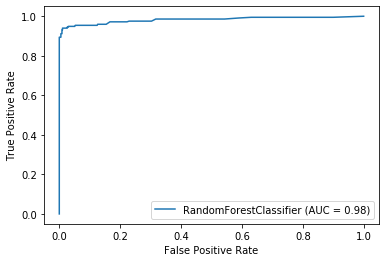

In [42]:
# aperfect model will have an AUC of 1
plot_roc_curve(clf,x_test,y_test)

our model has an AUC = 0.98 which is close to perfection, a perfect model achieves an AUC of 1, our model still has room for improvement

 Confusion matrix - it is a visual way to display where your model made the right predictions and the wrong predictions

In [43]:
print(confusion_matrix(y_test,y_preds))

[[566   5]
 [ 43 523]]


our model predicted 1, 5 times when it was suppossed to predict 0, it also predicted 0, 50 times when the correct value was 1.
you can use heatmap to get a better visual representation of confusion matrix

In [44]:
# show classification report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       571
           1       0.99      0.92      0.96       566

    accuracy                           0.96      1137
   macro avg       0.96      0.96      0.96      1137
weighted avg       0.96      0.96      0.96      1137



What's going on here?

Let's get a refresh.

* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

Ok, now we've got a few deeper insights on our model. But these were all calculated using a single training and test set.

What we'll do to make them more solid is calculate them using cross-validation.

How?

We'll take the best model along with the best hyperparameters and use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) along with various `scoring` parameter values.

`cross_val_score()` works by taking an estimator (machine learning model) along with data and labels. It then evaluates the machine learning model on the data and labels using cross-validation and a defined `scoring` parameter.

Let's remind ourselves of the best hyperparameters and then see them in action.

In [45]:
cv_acc = np.mean(cross_val_score(clf,X,
                         y,
                        cv = 5,
                        scoring = "accuracy"))
cv_acc

0.8029633730540521

In [46]:
cv_precision = np.mean(cross_val_score(clf,
                              X,
                              y,
                              scoring="precision"))
cv_precision

0.7482801415459278

In [47]:
cv_recall = np.mean(cross_val_score(clf,
                           X,
                           y,
                           scoring = "recall"))
cv_recall

0.7923314780457636

In [48]:
cv_f1 = np.mean(cross_val_score(clf,
                        X,
                       y,
                       scoring="f1"))
cv_f1

0.6645905655260249

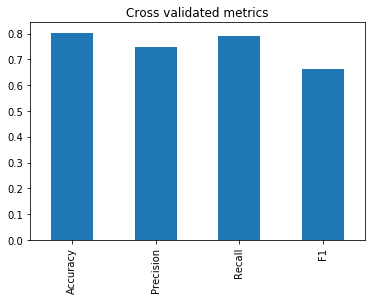

In [49]:
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross validated metrics",legend=False)

## Feature Importance

the last we are going to look at is feature importance, this is finding the features that most contributed to the outcome of our model,in our case, the features that helped the model predict whether a transaction is fraud or not.

Since we are using RandomForestClassifier, we need to find out how to get the feature importance

In [50]:
#let's fit an instance of RandomForest using clf
clf.fit(x_train,y_train)
clf.feature_importances_

array([0.00463277, 0.00833555, 0.02365482, 0.03973469, 0.11878815,
       0.00724087, 0.01622086, 0.03308373, 0.00896498, 0.02500244,
       0.10483163, 0.07643594, 0.08538749, 0.00829516, 0.16384959,
       0.00644101, 0.03611068, 0.10897196, 0.01115594, 0.01534551,
       0.01362544, 0.01674283, 0.00722187, 0.0071035 , 0.00431549,
       0.00667426, 0.00706056, 0.01516094, 0.0076244 , 0.01198696])

looking at it like these migght not make much sense, so we will combine with columns from our dataframe and zip it together so that it makes sense to us

In [51]:
feature_importance = dict(zip(df.columns,list(clf.feature_importances_)))
feature_importance


{'Time': 0.004632770832747444,
 'V1': 0.008335550932104165,
 'V2': 0.023654817315212684,
 'V3': 0.03973469415574418,
 'V4': 0.11878815484510917,
 'V5': 0.007240865290846399,
 'V6': 0.01622085937192827,
 'V7': 0.03308372933118681,
 'V8': 0.008964978353420151,
 'V9': 0.02500243516512122,
 'V10': 0.10483162854230701,
 'V11': 0.07643594001237633,
 'V12': 0.08538748635435786,
 'V13': 0.00829515754112598,
 'V14': 0.16384959205223876,
 'V15': 0.006441009732540201,
 'V16': 0.03611068039852141,
 'V17': 0.10897195917342066,
 'V18': 0.01115593722654526,
 'V19': 0.015345506108751338,
 'V20': 0.013625436717736559,
 'V21': 0.016742833647984418,
 'V22': 0.007221870667987003,
 'V23': 0.00710349876814251,
 'V24': 0.004315494646772879,
 'V25': 0.006674260309611323,
 'V26': 0.0070605570194298035,
 'V27': 0.015160937077831256,
 'V28': 0.007624395505566083,
 'Amount': 0.011986962903332798}

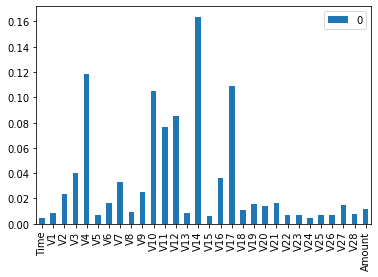

In [52]:
feature_df = pd.DataFrame(feature_importance,index=[0])
feature_df.T.plot.bar()

The result from above bar graph suggest that only 4 out of the 30 features as being important to our prediction model, feature importance helps in filtering out columns that would otherwise take space and consume computing power, while they do not contribute alot to our prediction model